In [1]:
from configparser import ConfigParser
import numpy as np
import matplotlib.pyplot as plt
from isoline_analysis_delta_r0 import isoline_properties_single_simulation
from simutils.vis import set_size

plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rcParams['font.size'] = 12

## Process the results from a set of combined annulus and rectangular simulations

### Get data from the annulus

In [2]:
config = ConfigParser()
filepath = './realisations/base-halfannulus/'
config.read(filepath + 'config.ini')

config2 = ConfigParser()
filepath = './realisations/base-rectangle/'
config2.read(filepath + 'config.ini')

['./realisations/base-rectangle/config.ini']

In [3]:
config = ConfigParser()
filepath = './realisations/base-halfannulus/'
config.read(filepath + 'config.ini')
angles = []
rs = []
speeds = []
ang_vels = []
ang_vels_max = []
ang_vels_min = []
ts = np.linspace(0.1, 12, 120)
times = []
for idx, t in enumerate(ts):
    if idx % 10 == 0:
        print(f'Currently at {t:.2f}')
    iso_coords = isoline_properties_single_simulation(config, filepath, time=t)
    times.append(np.ones_like(iso_coords['th']))
    angles.append(iso_coords['th'])
    rs.append(iso_coords['r'])
    ang_vels.append(np.mean(iso_coords['tang_velocity']))
    ang_vels_max.append(np.max(iso_coords['tang_velocity']))
    ang_vels_min.append(np.min(iso_coords['tang_velocity']))


Currently at 0.10
Currently at 1.10
Currently at 2.10
Currently at 3.10
Currently at 4.10
Currently at 5.10
Currently at 6.10
Currently at 7.10
Currently at 8.10
Currently at 9.10
Currently at 10.10
Currently at 11.10


In [4]:
config2 = ConfigParser()
filepath = './realisations/base-rectangle/'
config2.read(filepath + 'config.ini')
xs = []
ys = []
vels = []
ts = np.linspace(0.1, 12, 120)
times_rect = []
for idx, t in enumerate(ts):
    if idx % 10 == 0:
        print(f'Currently at {t:.2f}')
    iso_coords = isoline_properties_single_simulation(config2, filepath, time=t, annulus=False)
    times.append(np.ones_like(iso_coords['x']))
    xs.append(iso_coords['x'])
    ys.append(iso_coords['y'])
    vels.append(np.mean(iso_coords['speed']))
    #print(np.max(iso_coords['speed'] - np.min(iso_coords['speed'])))


Currently at 0.10
Currently at 1.10
Currently at 2.10
Currently at 3.10
Currently at 4.10
Currently at 5.10
Currently at 6.10
Currently at 7.10
Currently at 8.10
Currently at 9.10
Currently at 10.10
Currently at 11.10


### Get data from the rectangle

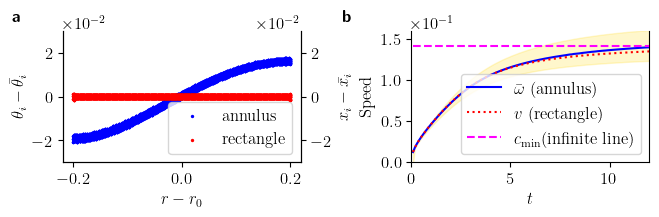

In [7]:

fig, axs = plt.subplots(ncols=2, figsize=set_size(468, subplots=(1, 2), padding_adjustment=1), layout='constrained')
ax = axs[0]
ax2 = ax.twinx()
ax1 = axs[1]
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
ax1.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
ax2.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
interrogation_ts = [2.0]

for interr_t in interrogation_ts:
    t_idx = np.argmin(np.abs(ts - interr_t))
    ax.scatter(rs[t_idx] - config.getfloat('geometry', 'r0'), angles[t_idx] - np.mean(angles[t_idx]), color='blue', label=r'\textrm{annulus}', s=2)
    ax.scatter(ys[t_idx] - config2.getfloat('geometry', 'ly')/2, xs[t_idx] - np.mean(xs[t_idx]), color='red', label=r'\textrm{rectangle}', s=2)
ax.set_xlabel(r'$r - r_0$')
ax.set_ylabel(r'$\theta_i - \bar{\theta_i}$')
ax.set_ylim(-0.03, 0.03)
ax2.set_ylabel(r'$x_i - \bar{x_i}$')
ax2.set_ylim(-0.03, 0.03)
ax.legend()


ax1.plot(ts, ang_vels, color='blue', label=r'$\bar{\omega}$ \textrm{(annulus)}')
ax1.fill_between(ts, ang_vels_min, ang_vels_max, color='gold', alpha=0.2)
ax1.plot(ts, vels, linestyle='dotted', color='red', label=r'$v$ \textrm{(rectangle)}')
ax1.plot(ts, np.ones_like(ts)*2*np.sqrt(config.getfloat('param', 'D')*config.getfloat('param', 'k')), '--', color='magenta', label=r'$c_{\textrm{min}} \textrm{(infinite line)}$')
#ax1.plot(ts, np.ones_like(ts)*2*np.sqrt(config.getfloat('param', 'D')*config.getfloat('param', 'k'))/0.842)
#ax1.plot(ts, np.ones_like(ts)*2*np.sqrt(config.getfloat('param', 'D')*config.getfloat('param', 'k'))/1.158)
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$\textrm{Speed}$')
ax1.set_xlim([0, 12])
ax1.set_ylim([0, 0.16])
ax1.set_yticks([0, 0.05, 0.10, 0.15])
ax1.spines['top'].set_visible(False)
ax1.legend(loc='lower right')
#ax2.tick_params(
#    axis='y',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    right=False,      # ticks along the bottom edge are off
#    left=False,
#    labelright=False)
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
fig.text(0.01, 0.95, r'\textbf{a}')
fig.text(0.52, 0.95, r'\textbf{b}')
plt.savefig('isoline_properties_rect_annulus.pdf', bbox_inches='tight')
plt.show()
#plt.close(fig)

In [26]:

r0_delta_strs = ['1.6', '1.0', '0.6']
iso_points_var_delta = []
t = 3
for sim_str in r0_delta_strs:
    config = ConfigParser()
    config.read('./realisations/changing-delta-for-epsilon-' + sim_str + '/config.ini')
    filepath = './realisations/changing-delta-for-epsilon-' + sim_str + '/'

    iso_points_var_delta.append(isoline_properties_single_simulation(config, filepath, time=3.0))

r0_strs = ['0.25', '0.4', '0.67']
iso_points_var_r0 = []
for r0_str_val in r0_strs:
    config2 = ConfigParser()
    print(r0_str_val)
    filepath = './realisations/changing-r0-for-epsilon-' + r0_str_val + '/'
    config2.read(filepath[:-1] + '/config.ini')
    iso_points_var_r0.append(isoline_properties_single_simulation(config2, filepath, time=3.0))

0.25
0.4
0.67


Angle at min r: -0.2945243104147917
0.45000000000000007 0.04999999999999999 0.25
Angle at min r: 0.7729315284104782
0.6000000000000003 0.19999999999999998 0.40000000000000013
Angle at min r: 1.1487116010294198
0.8670000000000001 0.46699999999999997 0.667
0.19999999999999996 1.8000000000000003
0.5 1.5000000000000002
0.7000000000000001 1.3000000000000003


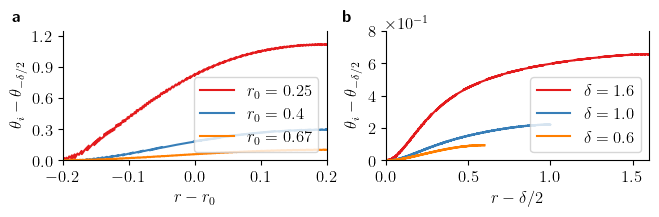

In [32]:
fig, axs = plt.subplots(ncols=2, figsize=set_size(468, subplots=(1, 2)), layout='constrained')
idx=0
idx2=0
test_colormap_2 = plt.cm.Set1.colors
test_colormap = plt.cm.Set2.colors
useful_colors = [plt.cm.Set1.colors[0], plt.cm.Set1.colors[1], plt.cm.Set1.colors[4]]
ax=axs[0]
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))

for idx, results_set in enumerate(iso_points_var_r0):

    r_sort_key = np.argsort(results_set['r'])
    angle_at_min_r = results_set['th'][r_sort_key][0]

    print('Angle at min r: {0}'.format(angle_at_min_r))
    # May break if isoline does not span R_i to R_e
    r_0 = (np.max(results_set['r'])+np.min(results_set['r']))/2
    print(np.max(results_set['r']), 
          np.min(results_set['r']),
          r_0)
    ax.plot(results_set['r'][r_sort_key] - r_0, 
            (results_set['th'][r_sort_key] - angle_at_min_r), 
             color=useful_colors[idx], label=r'$r_0={0}$'.format(np.round(r_0, 2)))
    #ax.vlines(results_set['all_r'][mask][med_angle_idx] - r_0, ymin=0, 
    #          ymax=1, color=test_colormap_2[idx], linestyles='dotted')

ax.spines.top.set_visible(False)
#ax.spines.right.set_visible(False)
ax.set_xlabel(r'$r-r_0$')
#ax.set_ylabel(r'$\omega_i - \bar{\omega_i}$')
ax.set_ylabel(r'$\theta_i - \theta_{- \delta/2}$')
ax.legend(loc='lower right',
          #ha='center', 
          #bbox_to_anchor=(0.5, 1.00), 
          ncol=1)
          #handletextpad=0.3)
ax.set_xlim([-0.2, 0.2])
ax.set_ylim([0.0, 1.25])
ax.set_yticks([0, 0.3, 0.6, 0.9, 1.2])

ax = axs[1]
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))


for idx2, results_set in enumerate(iso_points_var_delta):
    
    r_sort_key = np.argsort(results_set['r'])
    angle_at_min_r = results_set['th'][r_sort_key][0]
    #med_angle = np.median(results_set['iso_angles'][np.round(results_set['times_1'], 2) == t_snapshot])
    #med_angle_idx = results_set['iso_angles'][np.round(results_set['times_1'], 2) == t_snapshot] == med_angle

    # May break if isoline does not span R_i to R_e
    min_r = results_set['r'][r_sort_key][0]
    max_r = results_set['r'][r_sort_key][-1]
    print(min_r, max_r)
    #print(np.max(results_set['all_r'][mask]), np.min(results_set['all_r'][mask]),
    #      (np.max(results_set['all_r'][mask])+np.min(results_set['all_r'][mask]))/2)
    ax.plot((results_set['r'][r_sort_key] - min_r),#/(max_r-min_r), #- r_0, 
             #results_set['all_r'][mask][r_sort_key]*
             (results_set['th'][r_sort_key] - angle_at_min_r), 
             color=useful_colors[idx2], label=r'$\delta={0}$'.format(np.round((1-min_r)*2, 2)))


ax.spines.top.set_visible(False)
#ax.spines.right.set_visible(False)
ax.set_xlabel(r'$r-\delta/2$')
#ax.set_ylabel(r'$\omega_i - \bar{\omega_i}$')
ax.set_ylabel(r'$\theta_i - \theta_{- \delta/2}$')
ax.legend(loc='lower right', 
          #ha='center', 
          #bbox_to_anchor=(0.5, 1.00), 
          ncol=1)
#ax.text(1.15, 0.75, '$t=4$')
ax.set_ylim([0, 0.7])
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8])
ax.set_xlim([0, 1.6])
fig.text(0.01, 0.95, r'\textbf{a}')
fig.text(0.52, 0.95, r'\textbf{b}')
plt.savefig('isoline_properties_thickness_midline_pdf.pdf', dpi=600)
plt.show()